In [152]:
import pandas as pd 
#importing the data
df = pd.read_csv('Data1.csv',sep=' ')



In [153]:
#Dropping unwanted  columns
df = df.drop(['#','Unnamed: 1','23:Humedad_Exterior_Sensor'],axis=1)



In [154]:
#Getting the Day On the Date
day = pd.to_datetime(df['1:Date'])
df['24:Day_Of_Week'] = day.dt.day




In [155]:
#Dropping NA rows
df = df.dropna()
#Filling NA values
df = df.fillna(0)

In [156]:
#Converting all data to Float Data Type
df = df.astype(float)


In [157]:
#Splitting the data in Training and Testing Data
from sklearn.model_selection import train_test_split
X = df.drop(['6:CO2_Comedor_Sensor'	,'7:CO2_Habitacion_Sensor'],axis=1)
y = df[['6:CO2_Comedor_Sensor'	,'7:CO2_Habitacion_Sensor']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
#Training the Linear Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

model1 = LinearRegression()
model1.fit(X_train,y_train)


LinearRegression()

In [159]:
#Traing The Ridge Regression Model
model2 = Ridge(alpha=1.0,fit_intercept=True,solver='auto', random_state=None)
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength parameter
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge regression model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set


Ridge()

In [160]:
#Training The Decision Tree Model
model3 = DecisionTreeRegressor(max_depth=None,  min_samples_split=2,  min_samples_leaf=1,  max_features=None)

param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]     
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Decision Tree regression model with the best hyperparameters
best_decision_tree_model = DecisionTreeRegressor(**best_params)
best_decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=2)

In [161]:
#Making Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = best_ridge_model.predict(X_test)
y_pred3 = best_decision_tree_model.predict(X_test)

In [162]:
#Evaluating the Linear Regression Model
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
first_mse = mean_squared_error(y_test, y_pred1)
first_rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
first_r2 = r2_score (y_test, y_pred1)
print("MSE For Linear Regression: ", first_mse) 
print("RMSE For Linear Regression: ", first_rmse)
print("R^2 For Linear Regression: " , first_r2)


MSE For Linear Regression:  10.895270903818677
RMSE For Linear Regression:  3.3007985251782146
R^2 For Linear Regression:  0.7673115047360235


In [163]:
# Evaluating The Ridge Regression Model
second_mse = mean_squared_error(y_test, y_pred2)
second_rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
second_r2 = r2_score (y_test, y_pred2)
print("MSE For Ridge Regression: ", second_mse) 
print("RMSE For Ridge Regression: ", second_rmse)
print("R^2 For Ridge Regression: " , second_r2)


MSE For Ridge Regression:  10.893473461274317
RMSE For Ridge Regression:  3.3005262400523825
R^2 For Ridge Regression:  0.767353045585479


In [164]:
# Evaluating The Ddecision Tree Regression Model
third_mse = mean_squared_error(y_test, y_pred3)
third_rmse = np.sqrt(mean_squared_error(y_test,y_pred3))
third_r2 = r2_score (y_test, y_pred3)
print("MSE For Ridge Regression: ", third_mse) 
print("RMSE For Ridge Regression: ", third_rmse)
print("R^2 For Ridge Regression: " , third_r2)

MSE For Ridge Regression:  3.6683023931720937
RMSE For Ridge Regression:  1.915281283042283
R^2 For Ridge Regression:  0.9224477149480139


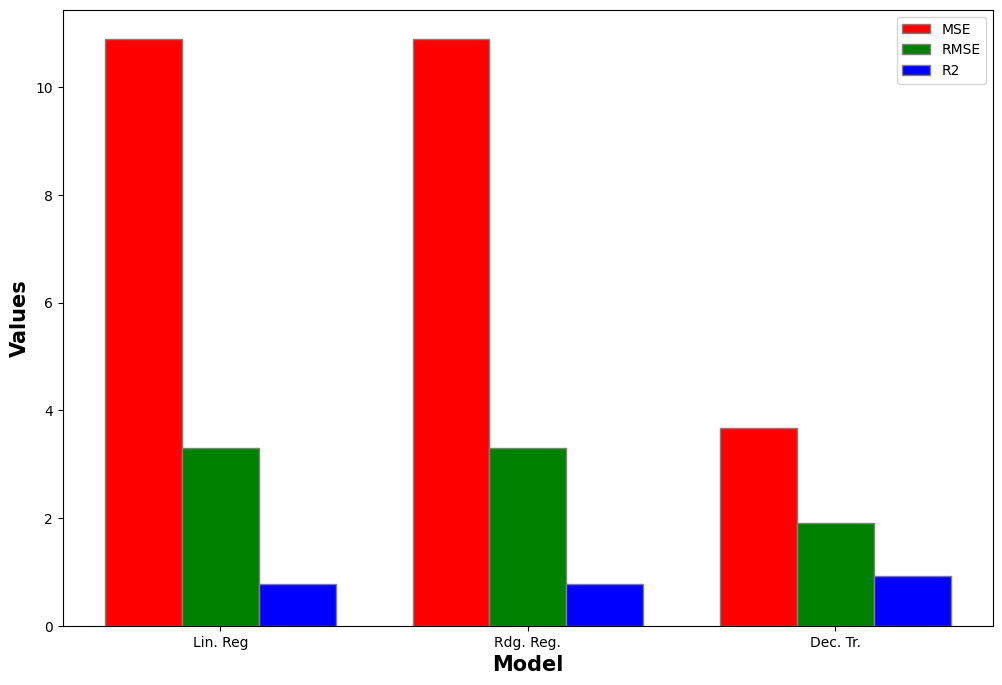

In [165]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
mse = [first_mse,second_mse,third_mse] 
rmse = [first_rmse,second_rmse,third_rmse] 
r2 = [first_r2,second_r2,third_r2] 
 
# Set position of bar on X axis 
br1 = np.arange(len(mse)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, mse, color ='r', width = barWidth, 
        edgecolor ='grey', label ='MSE') 
plt.bar(br2, rmse, color ='g', width = barWidth, 
        edgecolor ='grey', label ='RMSE') 
plt.bar(br3, r2, color ='b', width = barWidth, 
        edgecolor ='grey', label ='R2') 
 
# Adding Xticks 
plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Values', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(mse))], 
        ['Lin. Reg', 'Rdg. Reg.', 'Dec. Tr.',])
 
plt.legend()
plt.show() 

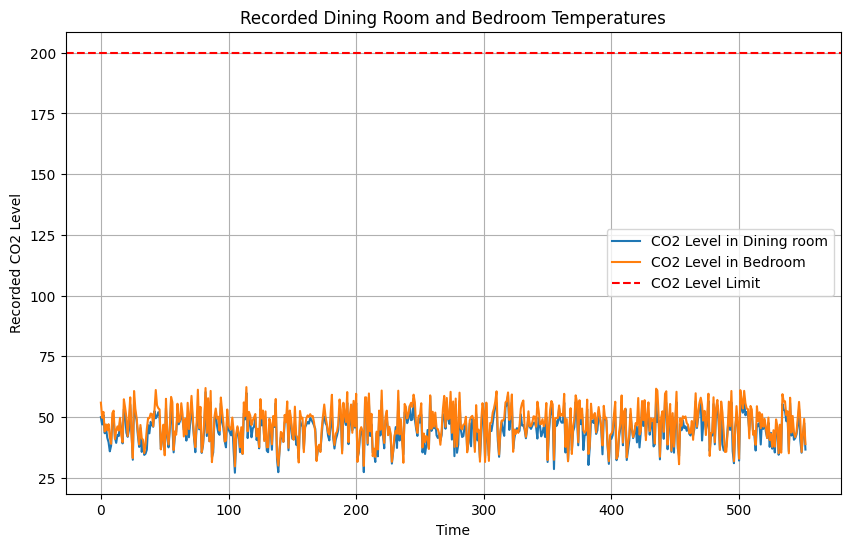

In [166]:
import matplotlib.pyplot as plt
import numpy as np

y_test_array = y_test.to_numpy()

y_CO2CS = y_test_array[:, 0]
y_CO2HS = y_test_array[:,1]

# Plotting the Recorded CO2 Levels
plt.figure(figsize=(10, 6))
plt.plot(y_CO2CS, label='CO2 Level in Dining room')
plt.plot(y_CO2HS, label='CO2 Level in Bedroom')
plt.axhline(y=200, color='r', linestyle='--', label='CO2 Level Limit')
plt.xlabel('Time')
plt.ylabel('Recorded CO2 Level')
plt.title('Recorded Dining Room and Bedroom Temperatures')
plt.legend()
plt.grid(True)
plt.show()


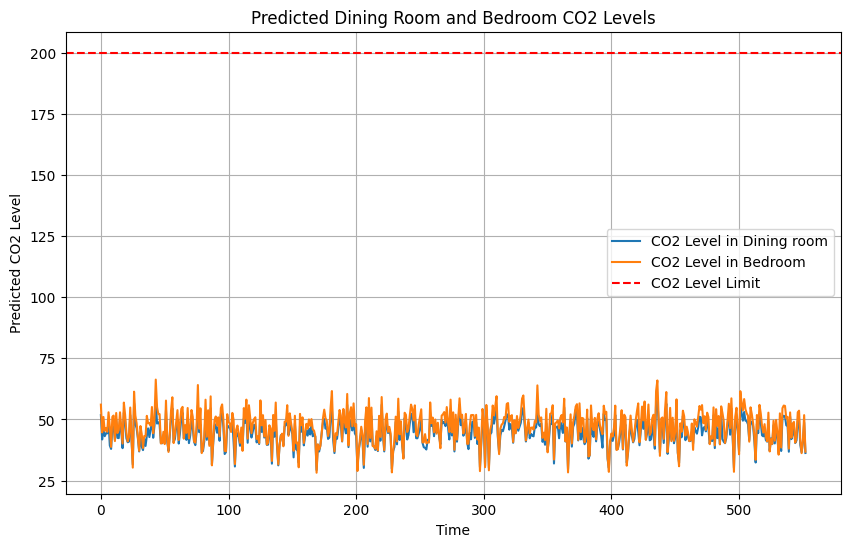

In [167]:
import matplotlib.pyplot as plt

y_CO2CS = y_pred1[:, 0]
y_CO2HS = y_pred1[:,1]

# Plotting the predicted CO2 Levels
plt.figure(figsize=(10, 6))
plt.plot(y_CO2CS, label='CO2 Level in Dining room')
plt.plot(y_CO2HS, label='CO2 Level in Bedroom')
plt.axhline(y=200, color='r', linestyle='--', label='CO2 Level Limit')
plt.xlabel('Time')
plt.ylabel('Predicted CO2 Level')
plt.title('Predicted Dining Room and Bedroom CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()


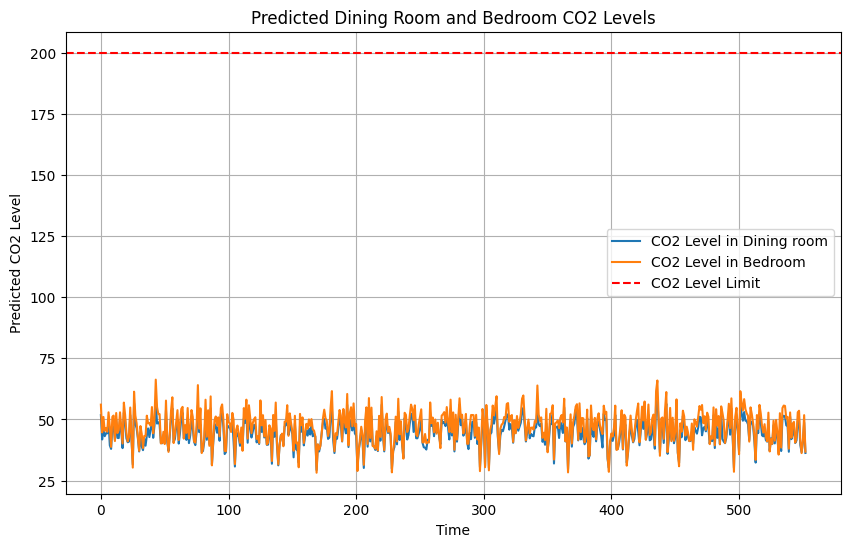

In [168]:
import matplotlib.pyplot as plt

y_CO2CS = y_pred2[:, 0]
y_CO2HS = y_pred2[:,1]

# Plotting the predicted CO2 Levels
plt.figure(figsize=(10, 6))
plt.plot(y_CO2CS, label='CO2 Level in Dining room')
plt.plot(y_CO2HS, label='CO2 Level in Bedroom')
plt.axhline(y=200, color='r', linestyle='--', label='CO2 Level Limit')
plt.xlabel('Time')
plt.ylabel('Predicted CO2 Level')
plt.title('Predicted Dining Room and Bedroom CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()


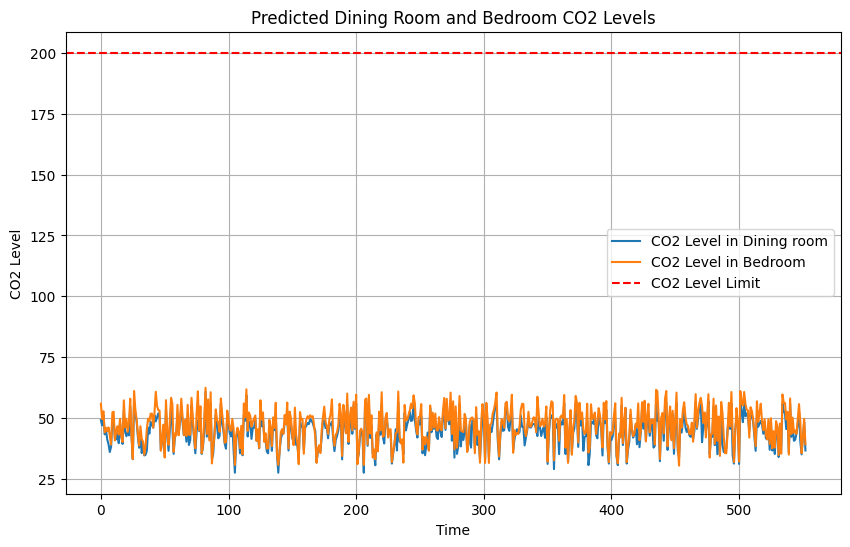

In [169]:
import matplotlib.pyplot as plt

y_CO2CS = y_pred3[:, 0]
y_CO2HS = y_pred3[:,1]

# Plotting the predicted CO2 Levels
plt.figure(figsize=(10, 6))
plt.plot(y_CO2CS, label='CO2 Level in Dining room')
plt.plot(y_CO2HS, label='CO2 Level in Bedroom')
plt.axhline(y=200, color='r', linestyle='--', label='CO2 Level Limit')
plt.xlabel('Time')
plt.ylabel('CO2 Level')
plt.title('Predicted Dining Room and Bedroom CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()
